In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [3]:
stats = pd.read_csv('out/stats.csv', names=['model', 'bs', 'lr', 'epochs', 'dur', 'loss', 'acc'])
stats.drop(columns=['bs', 'dur'], inplace=True)
stats['imp'] = [key.split('-')[0] for key in stats['model']]
stats = stats.groupby(['imp', 'lr', 'epochs']).agg(['mean', 'count']).reset_index()
stats

imp     lr epochs        loss           acc      
                               mean count    mean count
0    lstm  0.001      1  277.128756     2  0.5228     2
1    lstm  0.001      2  276.844680     2  0.5323     2
2    lstm  0.001      3  276.590057     2  0.5547     2
3    lstm  0.001      4  276.327980     2  0.5681     2
4    lstm  0.001      5  276.068053     2  0.5821     2
..    ...    ...    ...         ...   ...     ...   ...
175   rnn  0.300      6  105.751205     2  0.8206     2
176   rnn  0.300      7   91.878357     2  0.8548     2
177   rnn  0.300      8   81.980188     2  0.8541     2
178   rnn  0.300      9   71.613792     2  0.8493     2
179   rnn  0.300     10   63.878646     2  0.8509     2

[180 rows x 7 columns]

In [4]:
# sanity check the sample counts and then drop the counts to simplify further calculations
print(stats.loc[:, (['loss', 'acc'], ['count'])].agg(['unique']))
stats.drop(columns=[('loss', 'count'), ('acc', 'count')], inplace=True)

        loss   acc
       count count
unique   [2]   [2]


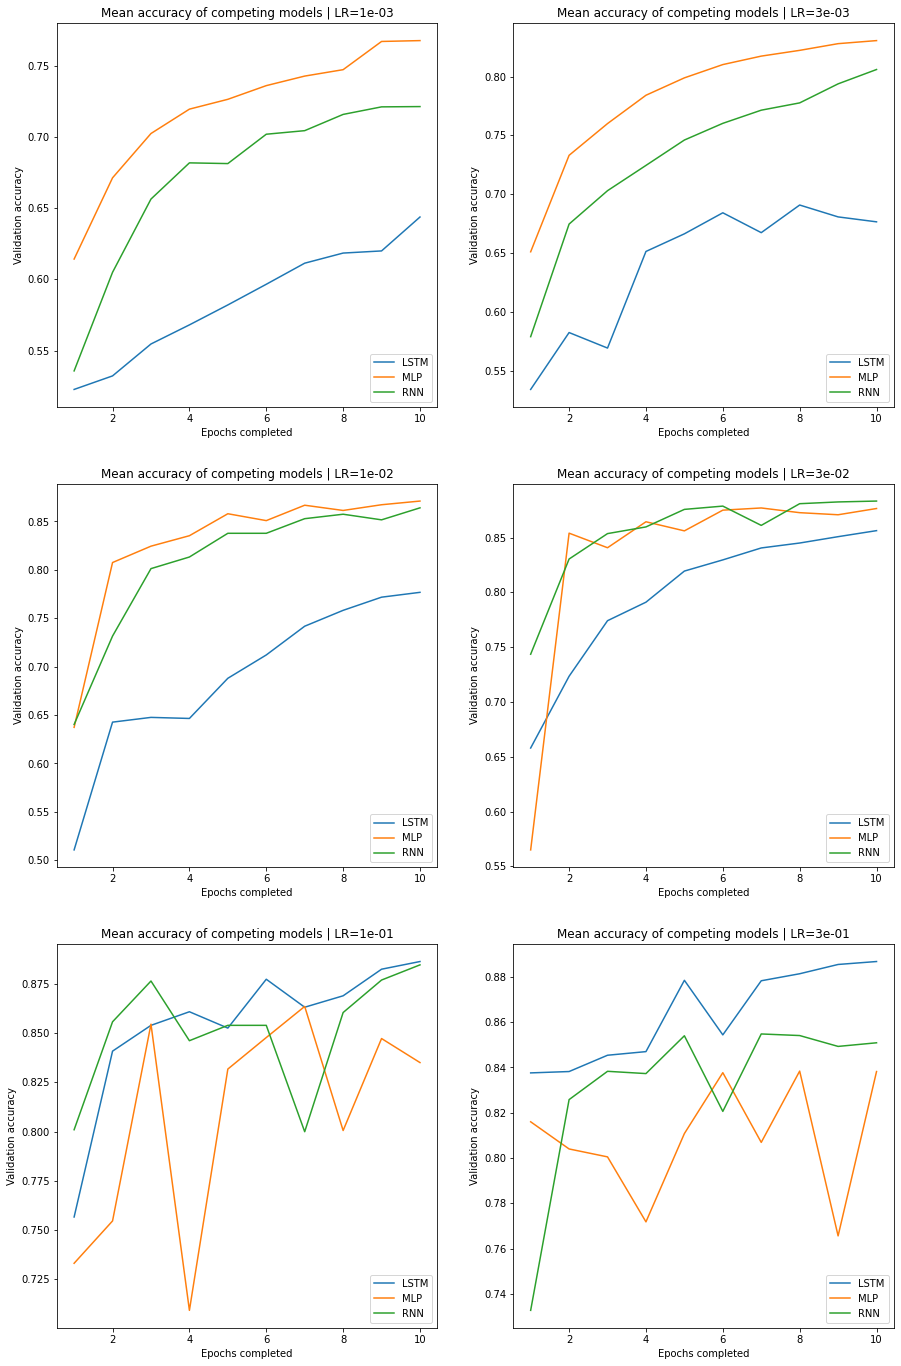

In [5]:
plt.figure(figsize=(15,24))

for c, lr in enumerate(stats['lr'].unique(), 1):
    plt.subplot(3, 2, c)
    for imp in stats['imp'].unique():
        dat = stats[(stats['lr'] == lr) & (stats['imp'] == imp)]
        plt.plot(dat['epochs'], dat['acc', 'mean'], label=imp.upper())
    plt.legend(loc='lower right')
    plt.title(f'Mean accuracy of competing models | LR={lr:.0e}')
    plt.xlabel('Epochs completed')
    plt.ylabel('Validation accuracy')

plt.show()

In [6]:
print('Summary of best mean accuracies:')
stats.drop(columns=['epochs', 'loss']).groupby(['lr', 'imp']).agg(['max']).reset_index()\
.sort_values(by=('acc', 'mean', 'max'), ascending=False)

Summary of best mean accuracies:


,lr,imp,acc
,,,mean
,,,max
15,0.300,lstm,0.8868
12,0.100,lstm,0.8863
14,0.100,rnn,0.8846
11,0.030,rnn,0.8834
10,0.030,mlp,0.8771
7,0.010,mlp,0.8711
8,0.010,rnn,0.8641
13,0.100,mlp,0.8635


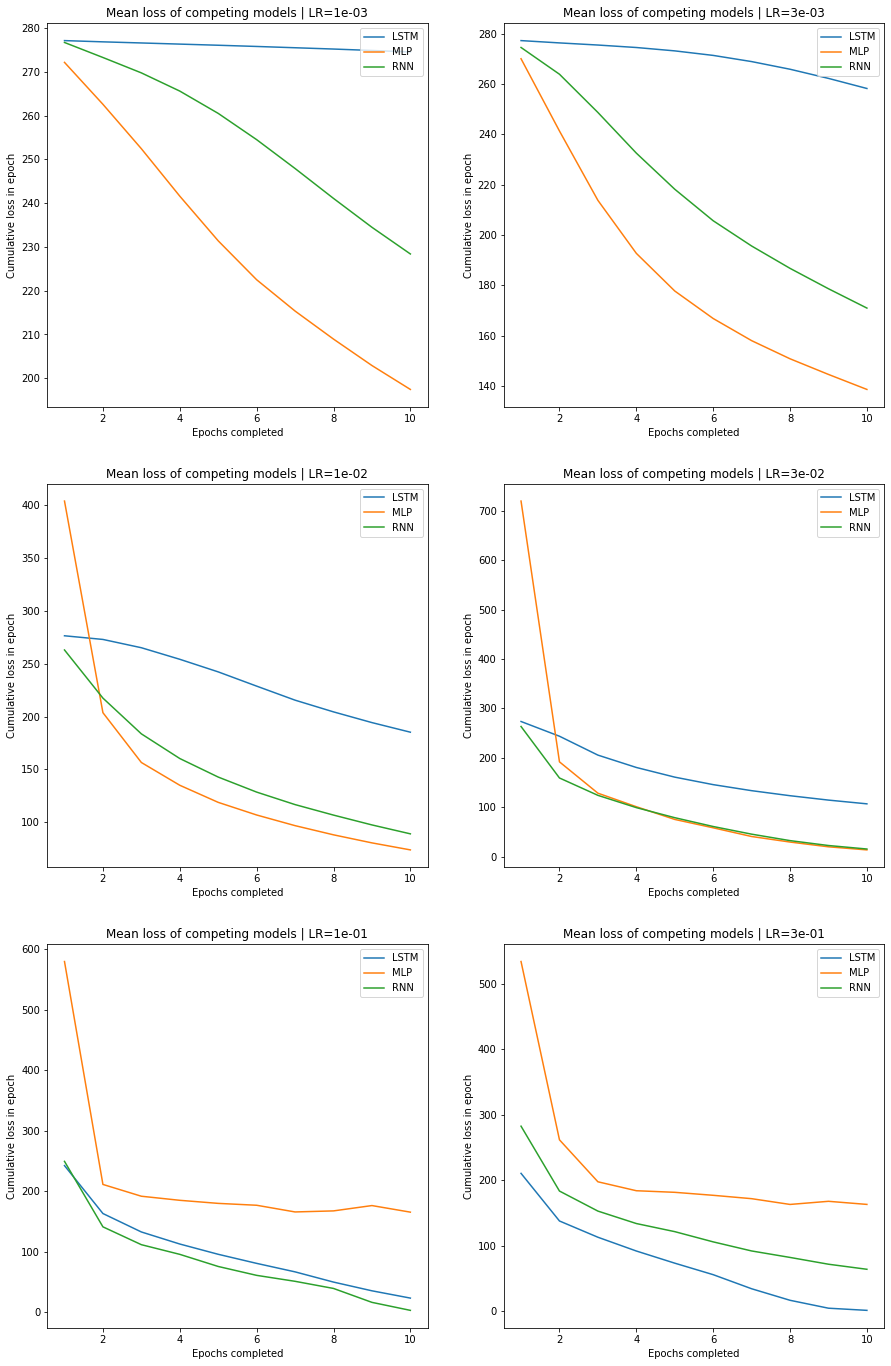

In [7]:
plt.figure(figsize=(15,24))

for c, lr in enumerate(stats['lr'].unique(), 1):
    plt.subplot(3, 2, c)
    for imp in stats['imp'].unique():
        dat = stats[(stats['lr'] == lr) & (stats['imp'] == imp)]
        plt.plot(dat['epochs'], dat['loss', 'mean'], label=imp.upper())
    plt.legend(loc='upper right')
    plt.title(f'Mean loss of competing models | LR={lr:.0e}')
    plt.xlabel('Epochs completed')
    plt.ylabel('Cumulative loss in epoch')

plt.show()

In [8]:
print('Summary of best mean losses:')
stats.drop(columns=['epochs', 'acc']).groupby(['lr', 'imp']).agg(['min']).reset_index()\
.sort_values(by=('loss', 'mean', 'min'), ascending=True)

Summary of best mean losses:


,lr,imp,loss
,,,mean
,,,min
15,0.300,lstm,1.132915
14,0.100,rnn,3.242141
10,0.030,mlp,13.479767
11,0.030,rnn,15.263817
12,0.100,lstm,23.525065
17,0.300,rnn,63.878646
7,0.010,mlp,74.017985
8,0.010,rnn,89.183654


In [9]:
stats = pd.read_csv('test/stats.csv', names=['model', 'bs', 'lr', 'epochs', 'dur', 'loss', 'acc'])
stats.drop(columns=['bs', 'lr', 'dur'], inplace=True)
stats['imp'] = [key.split('-')[0] for key in stats['model']]
stats = stats.groupby(['imp', 'epochs']).agg(['mean']).reset_index()
stats

,imp,epochs,loss,acc
,,,mean,mean
0,lstm,1,100.599032,0.87528
1,lstm,2,29.650767,0.87798
2,lstm,3,7.519378,0.88712
3,lstm,4,1.572094,0.88874
4,lstm,5,0.697911,0.88932
5,mlp,1,66.846307,0.86532
6,mlp,2,39.080935,0.86254
7,mlp,3,22.294409,0.86022
8,mlp,4,13.134214,0.86150


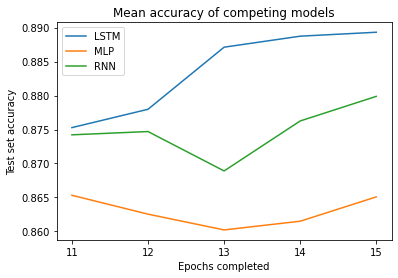

In [10]:
plt.figure()
for imp in stats['imp'].unique():
    dat = stats[stats['imp'] == imp]
    plt.plot(dat['epochs'], dat['acc', 'mean'], label=imp.upper())
plt.legend(loc='upper left')
plt.title(f'Mean accuracy of competing models')
plt.xticks(range(1, 5+1), range(10+1, 10+5+1))
plt.xlabel('Epochs completed')
plt.ylabel('Test set accuracy')
plt.show()